In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv("advertising.csv")

In [5]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
#checking the shape of the dataset
dataset.shape

(200, 4)

In [7]:
# What type of values are stored in the columns?
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [15]:
#looking at some statistical info about the data
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


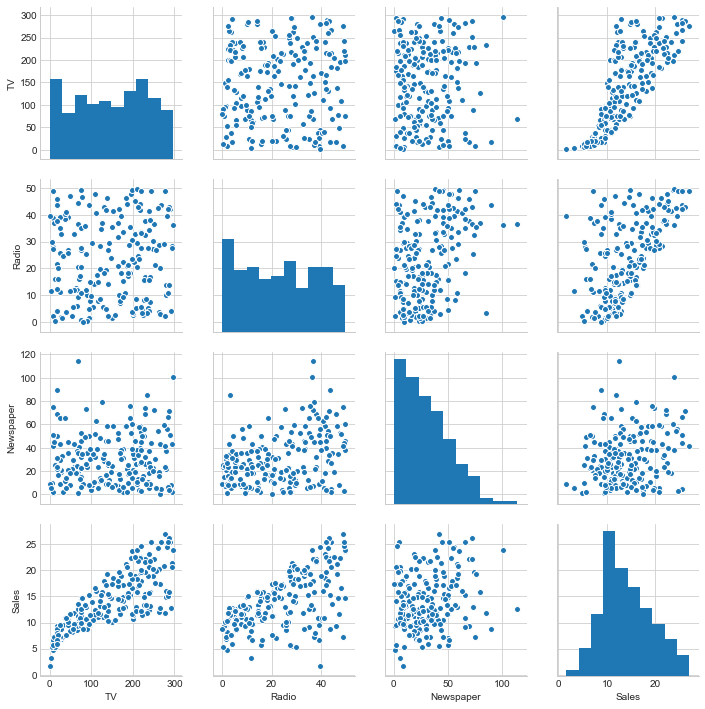

In [19]:
# visualizing the data to get more insight
sns.set_style("whitegrid")
plt.figure(figsize = (20,16))
sns.pairplot(dataset)

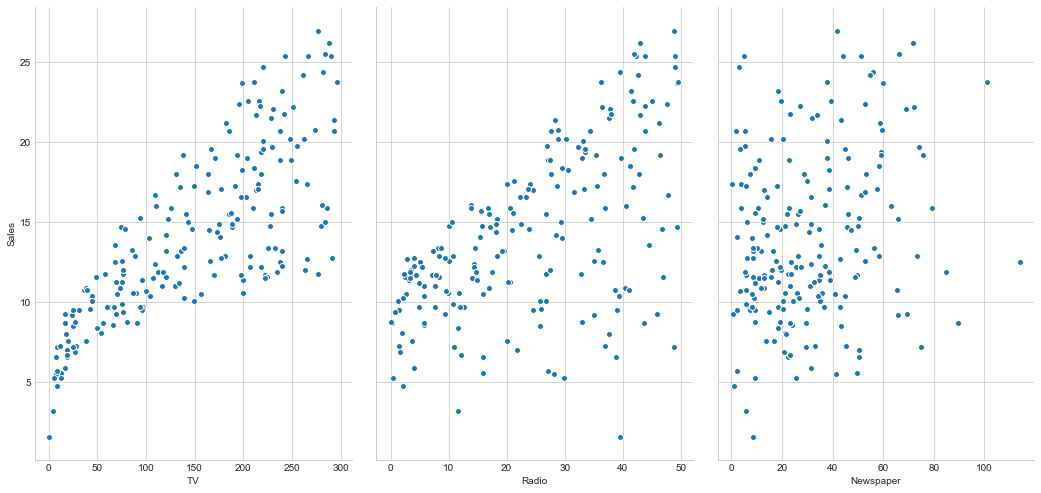

In [26]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(data = dataset, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, kind="scatter", aspect=0.7)

### spliting the data into dep. and indep. variables

In [37]:
X = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

### spliting the data into training set and test set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [41]:
x_train.shape

(140, 3)

In [42]:
x_test.shape

(60, 3)

### performing linear Regression

In [43]:
# creating the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

In [45]:
print("intercept: {}".format(model.intercept_))
print("coefficient: {}".format(model.coef_))

intercept: 2.652789668879498
coefficient: [0.0454256  0.18975773 0.00460308]


In [48]:
coeff_df = pd.DataFrame(model.coef_, x_train.columns, columns=["Coefficients"])

In [49]:
coeff_df

,Coefficients
TV,0.045426
Radio,0.189758
Newspaper,0.004603


### making Prediction

In [50]:
y_pred = model.predict(x_test)

### calulating the error term

In [51]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r2)

Mean_Squared_Error : 1.8506819941636943
r_square_value : 0.9058622107532247


### using stats model

In [59]:
import statsmodels.api as sm
x_constant = sm.add_constant(x_train)
smodel = sm.OLS(y_train, x_constant).fit()

In [61]:
smodel.params

const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [62]:
print(smodel.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           9.97e-66
Time:                        01:58:03   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

#### from the above information(p value) we can notice that newspaper is not a significant variable

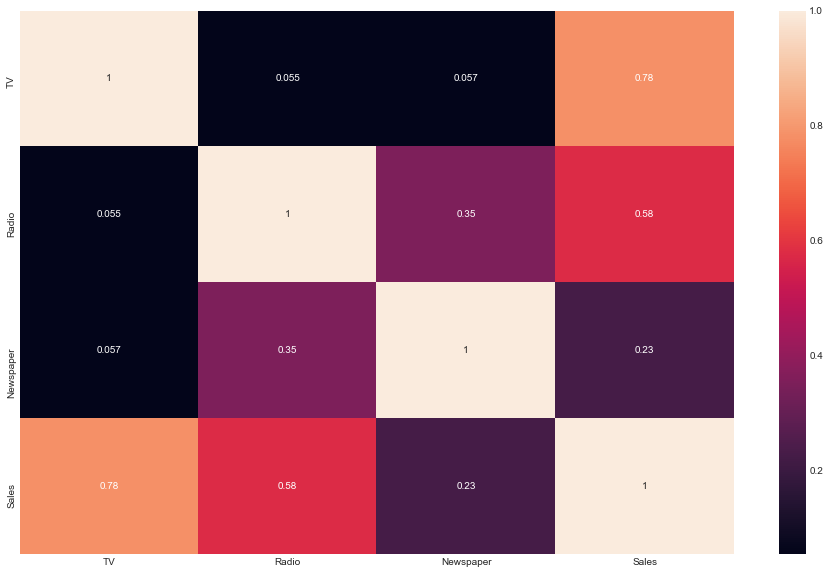

In [64]:
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot= True)

In [65]:
# From the data above, you can conclude that Newspaper is insignificant.
# we can exclude it from our model
x_new = dataset[["TV", "Radio"]]
y_new = dataset["Sales"]


In [66]:
from sklearn.model_selection import train_test_split
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X, y, train_size = 0.7, random_state = 100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [67]:
regressor = LinearRegression()
y_pred_new = regressor.fit(x_train_new, y_train_new)

In [68]:
y_pred_new.intercept_

2.652789668879498

In [70]:
y_pred_new.coef_

array([0.0454256 , 0.18975773, 0.00460308])

In [73]:
#making prediction on test data
y_predict = regressor.predict(x_test)

In [76]:
#checking r2 value
r2_new = r2_score(y_test_new, y_predict)

In [77]:
r2_new

0.9058622107532247

In [78]:
#chicking MSE value
mse_new = mean_squared_error(y_test_new, y_predict)

In [79]:
print(mse_new)

1.8506819941636943


## ploting the result

Text(0,0.5,'Sales')

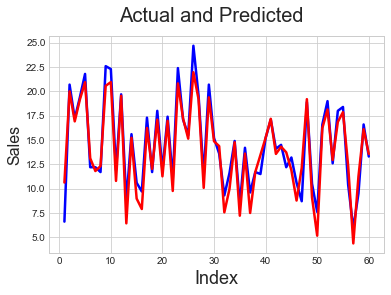

In [84]:
x = [ i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(x, y_test, color="blue", linewidth = 2.5, linestyle = "-")
plt.plot(x, y_predict, color="red", linewidth = 2.5, linestyle = "-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)   

Text(0,0.5,'ytest-ypred')

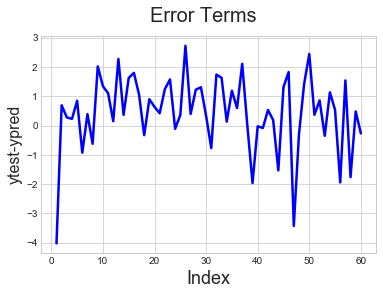

In [91]:
# Error terms
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test_new-y_predict, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)   

In [92]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_new, y_predict)
r_squared = r2_score(y_test_new, y_predict)

In [93]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 1.8506819941636943
r_square_value : 0.9058622107532247


In [95]:
X_train_final = x_train_new
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_final = sm.add_constant(X_train_final)
# create a fitted model in one line
lm_final = sm.OLS(y_train_new,X_train_final).fit()

print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Wed, 26 Dec 2018   Prob (F-statistic):           9.97e-66
Time:                        04:49:28   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.0

### Model Refinement Using RFE

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a featureimportances attribute. Then, the less important features are pruned from the the current set of features. This procedure is recursively repeated on the pruned dataset until the desired number of features to select is reached.


In [98]:
from sklearn.feature_selection import RFE
rfe = RFE(regressor, 2)
rfe = rfe.fit(x_train_new, y_train_new)

In [100]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]
